-------------------------------------------------------------------------------------------------------------------------------

# Data Cleaning

The most difficult and time-consuming part in building any predictive model is molding the data such that it makes the predictive model work more efficiently and effectively. Although this may sound like a tedious job we can easily make it possible by just keeping in mind the following golden rules. In this notebook, a systematic list of steps is given to clean, create, and make the data model ready.      

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("CreditData.csv")

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
CreditAmount = pd.DataFrame(df['Credit amount'])

We create another data frame "CreditAmount" with the record of the df attribute 'Credit amount' and use it later in our study. 

## 1. Understanding the Data

Before beginning any project we must understand the data we are dealing with. These studies include the data type of each attribute, count of data, count of missing values, minimum/maximum values, etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Our dataset consists of 1000 records with a mixture of numerical and categorical values. Most of the records have complete data, besides the attributes "Saving accounts and Checking account". These two attributes comprise 18 % and 39 % respectively of missing values of the entire dataset. Since the percentage of missing values are quite low we handle them. We observe that the maximum number of jobs a person can take in 3 for a duration of 72 hours. Customers applying for credit are between the age of 19-75.

## 2. Dealing with Missing Values

We noticed that the attributes "Saving accounts & Checking account" have missing values thus we replace the values with the highest occurring values within that attribute grouped by "Purpose".

In [8]:
missing = ['Saving accounts','Checking account']

In [9]:
for data in missing:
    print("*"*60)
    for i in range(len(df['Purpose'].value_counts().index)):
        rec = df['Purpose'].value_counts().index[i]
        recmode = df[df['Purpose'] == rec][data].mode()[0]
        print("The {} mode for the purpose {} is {} \n".format(data,rec,recmode))
    print("*"*60)

************************************************************
The Saving accounts mode for the purpose car is little 

The Saving accounts mode for the purpose radio/TV is little 

The Saving accounts mode for the purpose furniture/equipment is little 

The Saving accounts mode for the purpose business is little 

The Saving accounts mode for the purpose education is little 

The Saving accounts mode for the purpose repairs is little 

The Saving accounts mode for the purpose domestic appliances is little 

The Saving accounts mode for the purpose vacation/others is little 

************************************************************
************************************************************
The Checking account mode for the purpose car is little 

The Checking account mode for the purpose radio/TV is moderate 

The Checking account mode for the purpose furniture/equipment is little 

The Checking account mode for the purpose business is moderate 

The Checking account mode for the p

In [10]:
for data in missing:
    for i in range(len(df['Purpose'].value_counts().index)):
        rec = df['Purpose'].value_counts().index[i]
        recmode = df[df['Purpose'] == rec][data].mode()[0]
        df.loc[df[data].isnull() & df['Purpose'].eq(rec),data] = recmode

In [11]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

## 3. Handling Outliers

Outliers generally affect the accuracy of our predictive model. Therefore we need to eliminate all the outliers within our dataset. For this will use the "Interquartile Range Score". Here we use an ongoing loop until the IQR score is 0 which means that there are no more outliers present within the dataset.

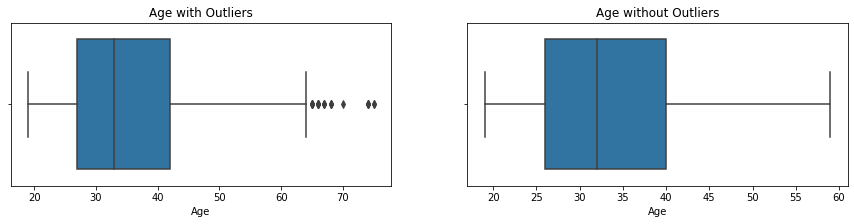

In [12]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.title("Age with Outliers")
sns.boxplot('Age', data=df)

plt.subplot(1,2,2)
plt.title("Age without Outliers")
df = df[df['Age'] < 60]
sns.boxplot('Age', data=df)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)
length = len(np.where((df > upper_bound) | (df < lower_bound))[0]) 
print("There are {} outliers present in the attribute".format(length))

There are 479 outliers present in the attribute


In [14]:
outlier = 1
while outlier > 0:
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outlier = len(np.where((df > upper_bound) | (df < lower_bound))[0]) 
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

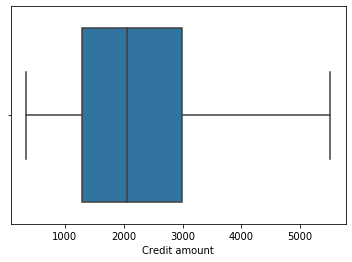

In [15]:
sns.boxplot('Credit amount', data=df)

Above is the representation of identifying/handling outliers with the help of a graphical and mathematical method, we can use either of the two methods to identify and eliminate any outliers.

In [16]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
4,53,male,2,free,little,little,4870,24,car
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment
10,25,female,2,rent,little,moderate,1295,12,car
12,22,female,2,own,little,moderate,1567,12,radio/TV
14,28,female,2,rent,little,little,1403,15,car


## 4. Data Normalization

Continuous data can be one of the causes that result in a poor model score, this is because the model fails to predict the wide range of available data. To handle this we need to rescale the data to a smaller range.  

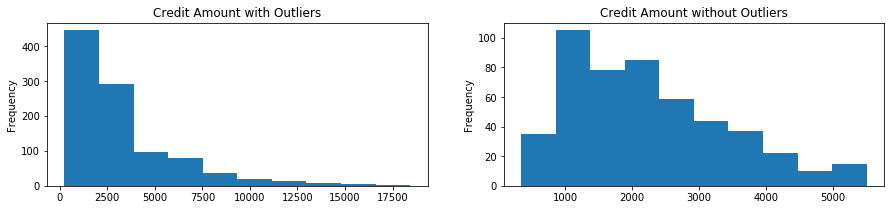

In [17]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.title("Credit Amount with Outliers")
CreditAmount['Credit amount'].plot(kind='hist')

plt.subplot(1,2,2)
plt.title("Credit Amount without Outliers")
df['Credit amount'].plot(kind='hist')

We use the CreditAmount data frame to create an histogram. This is an another way we can identify whether or not there are outliers within a dataset. In the first plot, we notice that the histogram is "Positively Skewed" which means that there are few values that belong to a higher credit amount and the maximum number of values lies between 0-6800. Whereas the plot without outliers has all the outliers eliminated. We now transform the data such that it has a smaller scale. 

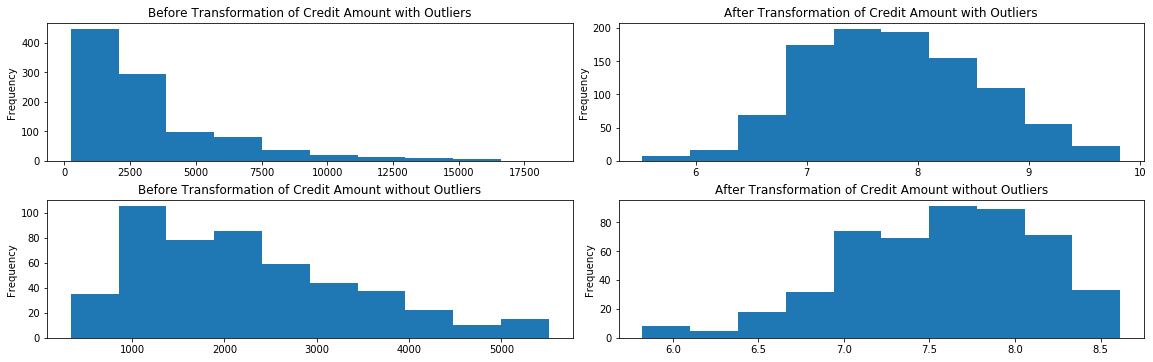

In [18]:
plt.figure(figsize=(16,5))

plt.subplot(2,2,1)
plt.title("Before Transformation of Credit Amount with Outliers")
CreditAmount['Credit amount'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("After Transformation of Credit Amount with Outliers")
CreditAmount['Credit amount'] = CreditAmount['Credit amount'].apply(lambda x: np.log(x))
CreditAmount['Credit amount'].plot(kind='hist')

plt.subplot(2,2,3)
plt.title("Before Transformation of Credit Amount without Outliers")
df['Credit amount'].plot(kind='hist')

plt.subplot(2,2,4)
plt.title("After Transformation of Credit Amount without Outliers")
df['Credit amount'] = df['Credit amount'].apply(lambda x: np.log(x))
df['Credit amount'].plot(kind='hist')


plt.tight_layout(pad=0.6)

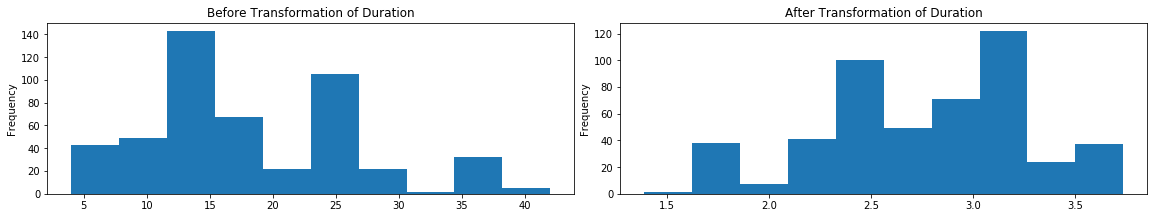

In [19]:
plt.figure(figsize=(16,3))

plt.subplot(1,2,1)
plt.title("Before Transformation of Duration")
df['Duration'].plot(kind='hist')

plt.subplot(1,2,2)
plt.title("After Transformation of Duration")
df['Duration'] = df['Duration'].apply(lambda x: np.log(x))
df['Duration'].plot(kind='hist')

plt.tight_layout(pad=0.6)

Thus, we have transformed "Credit amount and Duration" into smaller or rather I would say a compact range of numerical.

## 5. Feature Building

In the given data set we observe that there is no target set given, thus we create an attribute that will classify whether or not we should consider sanctioning credit given to a customer is of high risk or low risk. We initially assume credit given to all customers is of high risk and later put forth some conditions that would identify the low risk from the high-risk customers.

In [20]:
df['Saving accounts'] = df['Saving accounts'].replace("quite rich","rich")

In [21]:
df['Risk'] = 'high'
condition1 = df[(df['Saving accounts'] == 'rich') & (df['Checking account'] == 'rich')].index
condition2 = df[(df['Saving accounts'] == 'rich') & ((df['Checking account'] == 'little') | (df['Checking account'] == 'moderate'))].index
condition3 = df[(df['Checking account'] == 'rich') & ((df['Saving accounts'] == 'little') | (df['Saving accounts'] == 'moderate'))].index

In [22]:
for i in condition1,condition2,condition3:
    df['Risk'].loc[i] = 'low'

C:\Users\Ginelle\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
4,53,male,2,free,little,little,8.490849,3.178054,car,high
6,53,male,2,own,rich,little,7.949797,3.178054,furniture/equipment,low
10,25,female,2,rent,little,moderate,7.166266,2.484907,car,high
12,22,female,2,own,little,moderate,7.356918,2.484907,radio/TV,high
14,28,female,2,rent,little,little,7.246368,2.708050,car,high
16,53,male,2,own,little,moderate,7.793174,3.178054,radio/TV,high
19,31,male,2,own,rich,moderate,8.140316,3.178054,radio/TV,low
20,48,male,2,own,little,little,7.665753,2.197225,car,high
21,44,male,2,rent,rich,little,7.881182,1.791759,radio/TV,low
23,44,male,2,own,moderate,moderate,7.497762,2.484907,car,high


## 6. Data Encoding

<h4>Using Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Housing'] = encoder.fit_transform(df['Housing'])
df['Saving accounts'] = encoder.fit_transform(df['Saving accounts'])
df['Purpose'] = encoder.fit_transform(df['Purpose'])
df['Risk'] = encoder.fit_transform(df['Risk'])

<h4> Using Map function

In [26]:
df['Checking account'] = df['Checking account'].map({'little':0,'moderate':1,'rich':2})

<h4>Using Binning

In [27]:
df['Age'] = pd.qcut(df['Age'], q=4, labels=[0,1,2,3])

In [28]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
4,3,1,2,0,0,0,8.490849,3.178054,1,0
6,3,1,2,1,2,0,7.949797,3.178054,4,1
10,0,0,2,2,0,1,7.166266,2.484907,1,0
12,0,0,2,1,0,1,7.356918,2.484907,5,0
14,1,0,2,2,0,0,7.246368,2.708050,1,0


# Data Modeling

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

X = df.drop(['Risk'],axis=1)
y = df['Risk']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(solver='lbfgs',max_iter=500)
lmodel.fit(X_train,y_train)
lpredictions = lmodel.predict(X_test)

In [32]:
lscore = round((lmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",lscore,"%")


Model Score: 91.16 %


## 2. K-Nearest Neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X_train,y_train)
kpredictions = kmodel.predict(X_test)

In [34]:
kscore = round((kmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",kscore,"%")


Model Score: 92.52 %


## 3.Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)
dprediction = dmodel.predict(X_test)

In [36]:
dscore = round((dmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",dscore,"%")


Model Score: 100.0 %


## 4.Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators=100)
rmodel.fit(X_train,y_train)
rprediction = rmodel.predict(X_test)

In [38]:
rscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",rscore,"%")


Model Score: 100.0 %


## 5.Support Vector Machine

In [39]:
from sklearn.svm import SVC
smodel = SVC(gamma='scale')
smodel.fit(X_train,y_train)
sprediction = smodel.predict(X_test)

In [40]:
sscore = round((smodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",sscore,"%")


Model Score: 93.2 %


-------------------------------------------------------------------------------------------------------------------------------